# Modelo serie temporal - Instagram

In [1]:
# Versão da Linguagem Python
from platform import python_version

print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.1
pandas    : 1.2.4
watermark : 2.3.0
matplotlib: 3.3.4
numpy     : 1.19.5
plotly    : 5.6.0



In [4]:
# Configuração para os gráficos largura e layout dos graficos

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.0)
color = sns.color_palette()

# Base dados

In [5]:
df = pd.read_csv("Instagram_Data.csv")
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37


In [6]:
# Exibido 5 primeiros dados
df.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51


In [7]:
# Exibido 5 últimos dados 
df.tail()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37
178921,1089,9,823,0.07,Image,0,0,2018-11-27 14:27:42,2018,11,27,14,27


In [8]:
# Número de linhas e colunas
df.shape

(178922, 13)

In [9]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


In [10]:
# Exibido tipos de dados
df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 178922
Números de colunas: 13


In [12]:
# Total de número duplicados

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
178917    False
178918    False
178919    False
178920    False
178921    False
Length: 178922, dtype: bool

# Estatística descritiva

In [13]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User uuid,178922.0,546.316948,317.200142,1.0,273.0,540.00,829.00,1089.0
Likes,178922.0,42988.058210,260464.772876,0.0,134.0,1064.00,10743.00,15445692.0
Days passed from post,178922.0,447.477510,492.620418,0.0,107.0,260.00,612.00,3775.0
Likes Score,178922.0,0.270961,0.210007,0.0,0.1,0.22,0.39,1.0
Numer of Tags,178922.0,3.578045,6.877008,0.0,0.0,0.00,3.00,31.0
Numer of Comments,178922.0,562.228547,12013.796631,0.0,4.0,23.00,135.75,2907644.0
Year,178922.0,2019.412107,1.374731,2010.0,2019.0,2020.00,2020.00,2021.0
Month,178922.0,6.764814,3.753390,1.0,3.0,7.00,10.00,12.0
Day,178922.0,15.694219,8.824645,1.0,8.0,16.00,23.00,31.0
Hour,178922.0,13.396435,7.385343,0.0,7.0,16.00,20.00,23.0


In [14]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,User uuid,Likes,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
User uuid,1.000000,-0.053619,-0.015045,0.002267,0.023316,-0.015851,0.019735,-0.021988,-0.001262,-0.020272,0.001469
Likes,-0.053619,1.000000,-0.021166,0.098751,-0.056393,0.331592,0.021073,-0.001757,0.006703,-0.010901,-0.002741
Days passed from post,-0.015045,-0.021166,1.000000,-0.105619,-0.106991,-0.008953,-0.973474,-0.031002,-0.000933,-0.022644,0.018310
Likes Score,0.002267,0.098751,-0.105619,1.000000,0.029918,0.044935,0.104627,-0.004779,0.004406,0.023877,0.006446
Numer of Tags,0.023316,-0.056393,-0.106991,0.029918,1.000000,-0.015836,0.103394,0.006596,0.001374,0.039306,-0.016226
Numer of Comments,-0.015851,0.331592,-0.008953,0.044935,-0.015836,1.000000,0.007511,0.005160,0.005506,0.003286,0.002358
Year,0.019735,0.021073,-0.973474,0.104627,0.103394,0.007511,1.000000,-0.197835,-0.028109,0.020589,-0.017410
Month,-0.021988,-0.001757,-0.031002,-0.004779,0.006596,0.005160,-0.197835,1.000000,0.050763,0.005403,-0.002299
Day,-0.001262,0.006703,-0.000933,0.004406,0.001374,0.005506,-0.028109,0.050763,1.000000,0.005283,-0.002278
Hour,-0.020272,-0.010901,-0.022644,0.023877,0.039306,0.003286,0.020589,0.005403,0.005283,1.000000,0.001849


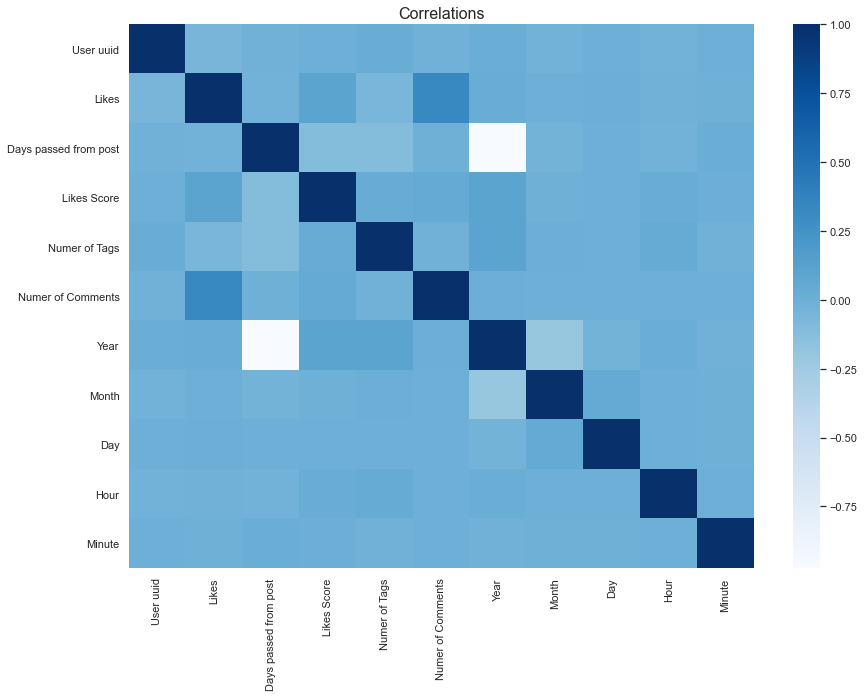

In [15]:
# Gráfico da matrz de correlação 

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations", size=16)
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

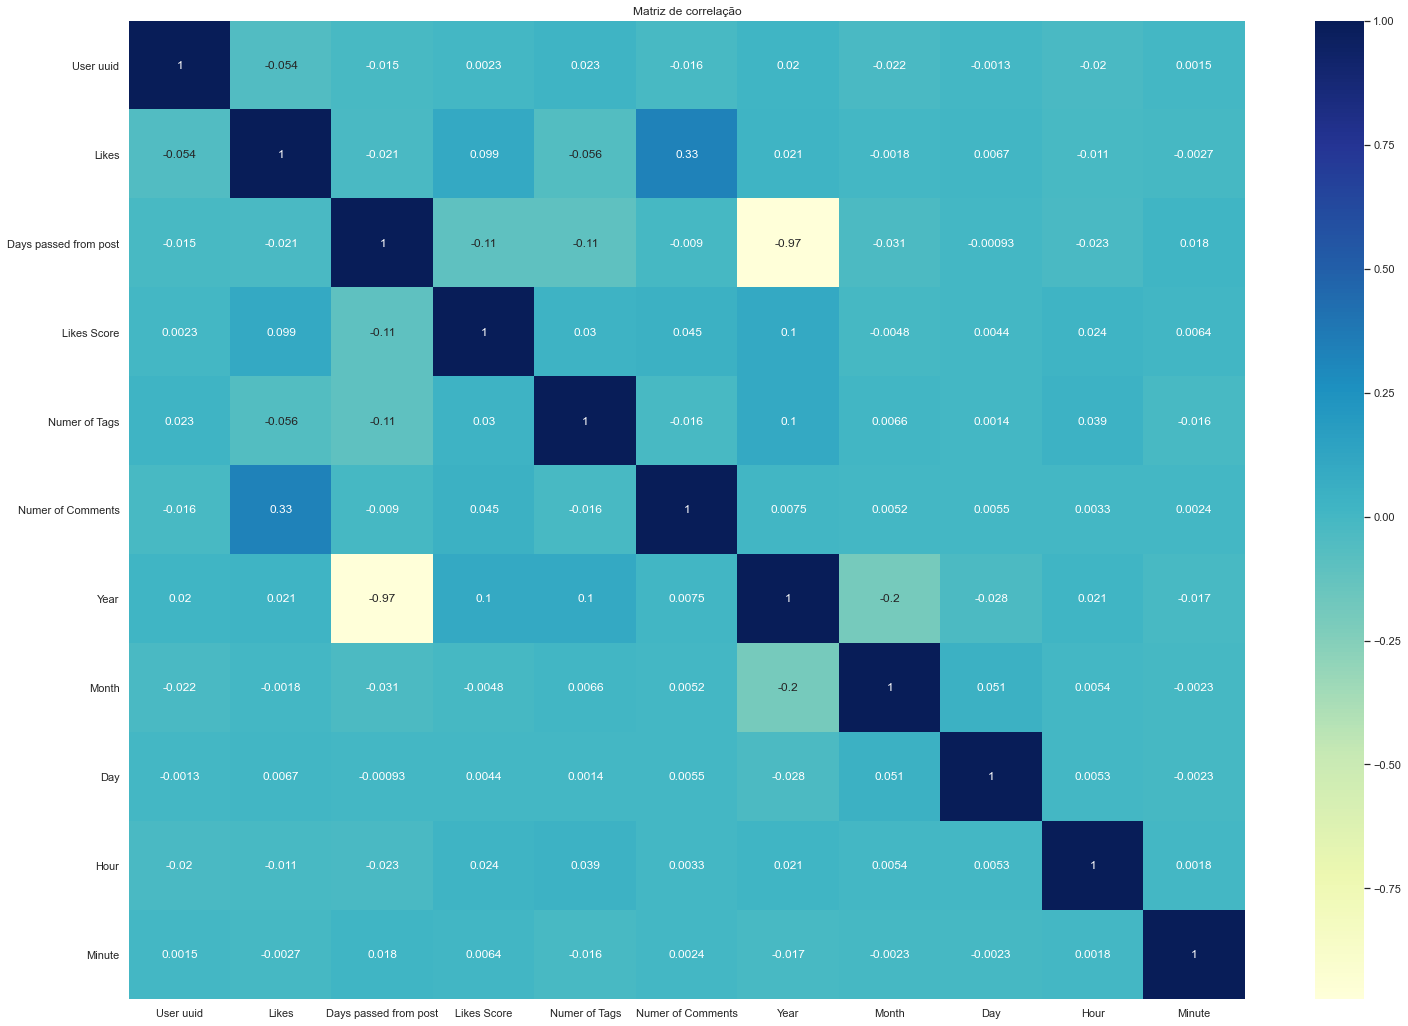

In [16]:
# Gráfico da matriz de correlação

plt.figure(figsize=(25,18))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

<AxesSubplot:xlabel='Type', ylabel='count'>

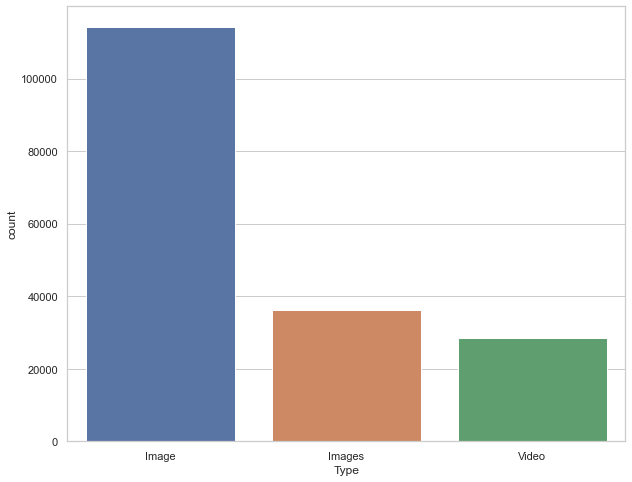

In [17]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.countplot(df["Type"])

<AxesSubplot:xlabel='Year', ylabel='count'>

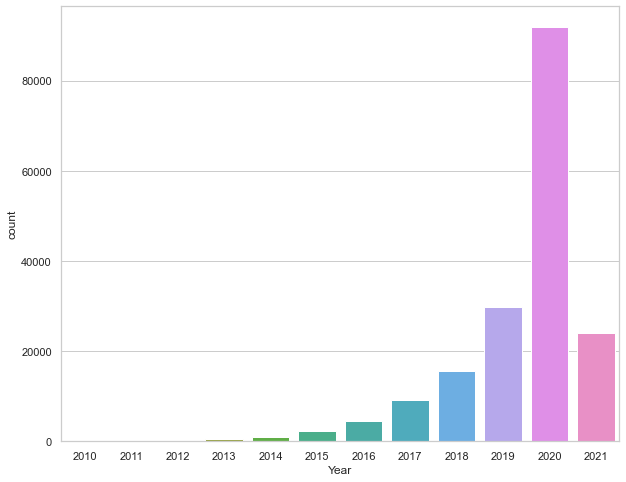

In [18]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.countplot(df["Year"])

<AxesSubplot:xlabel='Hour', ylabel='Count'>

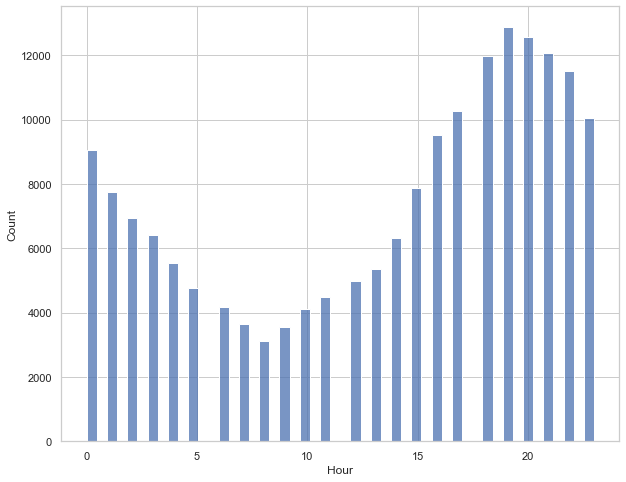

In [19]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.histplot(df["Hour"])

<AxesSubplot:xlabel='Minute', ylabel='Count'>

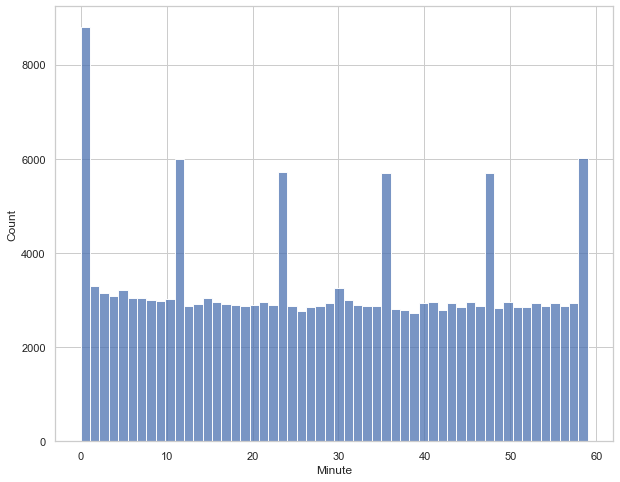

In [20]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.histplot(df["Minute"])

<AxesSubplot:xlabel='Days passed from post', ylabel='Density'>

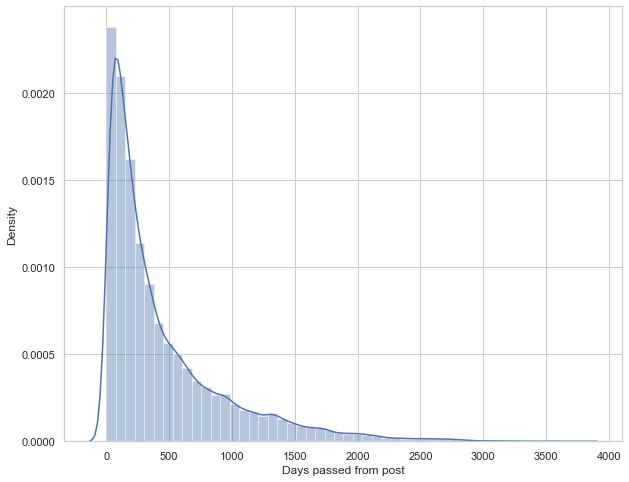

In [21]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.distplot(df["Days passed from post"])

<AxesSubplot:xlabel='Likes Score', ylabel='Count'>

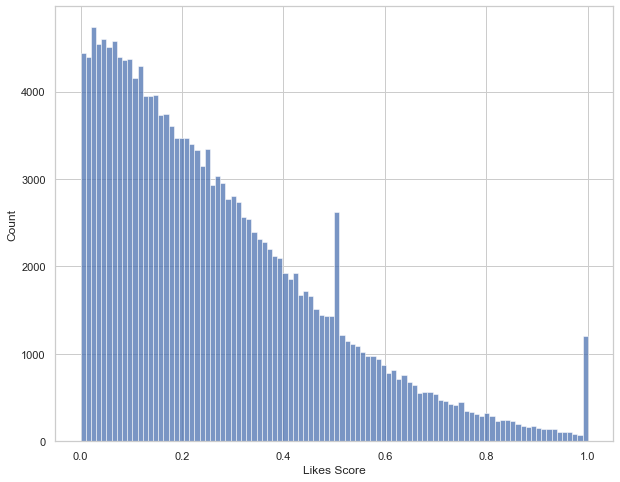

In [22]:
# Gráfico de barras
plt.figure(figsize=(10,8))

sns.histplot(df["Likes Score"])

# Aprendizagem não supervisionado

In [23]:
pd.set_option('display.max_colwidth', 100)
df.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51


In [24]:
colunas = df.columns
colunas

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

In [25]:
x = df[["Likes", "Days passed from post", "Numer of Tags", "Year", "Hour", "Minute", "Month", "Day"]]
y = df[["Likes Score", "Numer of Tags","Numer of Comments"]]

In [26]:
x.shape

(178922, 8)

In [27]:
y.shape

(178922, 3)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler_pre = StandardScaler()
scaler_pre_fit_train = scaler_pre.fit_transform(x)
scaler_pre_fit_train

array([[-0.16310143,  0.42532357, -0.08405499, ..., -0.60760367,
        -0.47019328, -0.41862637],
       [-0.16356599,  0.42532357, -0.52029246, ..., -0.2116504 ,
        -0.47019328, -0.41862637],
       [-0.16361206,  0.44359327,  0.0613575 , ..., -0.60760367,
        -0.47019328, -1.43850031],
       ...,
       [-0.16503644,  0.76026799, -0.52029246, ..., -0.0985209 ,
         1.12836619,  1.39448284],
       [-0.16499037,  0.76026799, -0.52029246, ...,  0.46712662,
         1.12836619,  1.39448284],
       [-0.16500956,  0.76229796, -0.52029246, ..., -0.0985209 ,
         1.12836619,  1.28116352]])

In [29]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

# Divisão em Dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(scaler_pre_fit_train, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [30]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(125245, 8)

In [31]:
# Total de linhas dos dados de treino y

x_train.shape

(125245, 8)

In [32]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(53677, 8)

In [33]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(53677, 3)

# PCA - Redução de dimensionalidade

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x_train)
components = pca.explained_variance_ratio_
components

array([0.25219086, 0.13497977])

In [35]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

k = 20

kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x_train)

<AxesSubplot:>

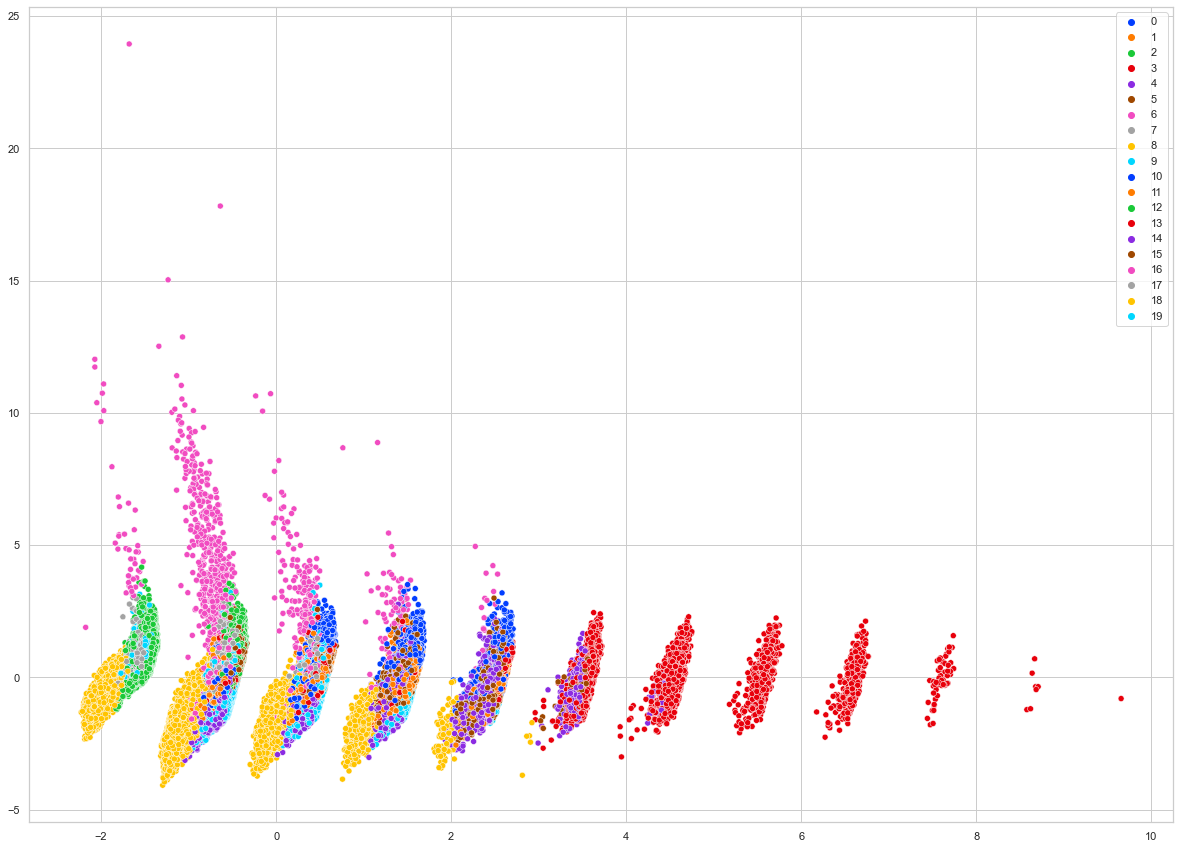

In [36]:
plt.figure(figsize=(20.5, 15))

palette = sns.color_palette('bright', len(set(y_pred)))
sns.scatterplot(X_pca[:,0], 
                X_pca[:, 1], 
                hue = y_pred, 
                legend='full', palette=palette)

# Clusters

Text(0, 0.5, 'WCSS')

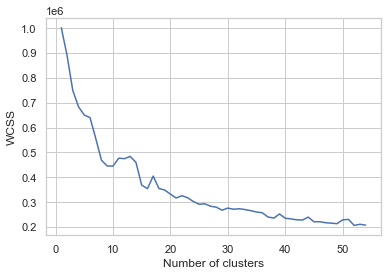

In [37]:
from sklearn.cluster import MiniBatchKMeans

wcss = []

for i in range(1, 55):
    kmeans = MiniBatchKMeans(n_clusters = i, 
                             random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 55), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Modelo k-means

In [38]:
from sklearn.cluster import KMeans

k = 55

kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x_train)
y_pred

array([33, 12, 16, ..., 48, 53, 46])

# Modelo K-Means - 02

In [39]:
agrupador = KMeans(n_clusters = 55)

agrupador.fit(x_train)
labels_1 = agrupador.labels_
print("Grupo - 1", labels_1)

agrupador.fit(x_train)
labels_2 = agrupador.labels_
print("Grupo - 2", labels_2)

agrupador.fit(x_train)
labels_3 = agrupador.labels_
print("Grupo - 3", labels_3)

agrupador.fit(x_train)
labels_4 = agrupador.labels_
print("Grupo - 4", labels_4)

agrupador.fit(x_train)
labels_5 = agrupador.labels_
print("Grupo - 5", labels_5)

agrupador.fit(x_train)
labels_6 = agrupador.labels_
print("Grupo - 6", labels_6)

agrupador.fit(x_train)
labels_7 = agrupador.labels_
print("Grupo - 7", labels_7)

Grupo - 1 [11 45 18 ... 28 29 38]
Grupo - 2 [46 20 16 ... 18 49 14]
Grupo - 3 [18  3 29 ... 28 36 48]
Grupo - 4 [17  0 52 ... 21 15 26]
Grupo - 5 [42 28 40 ...  1 45  3]
Grupo - 6 [38 16  1 ...  5 21 26]
Grupo - 7 [20 21 46 ... 27 24 54]


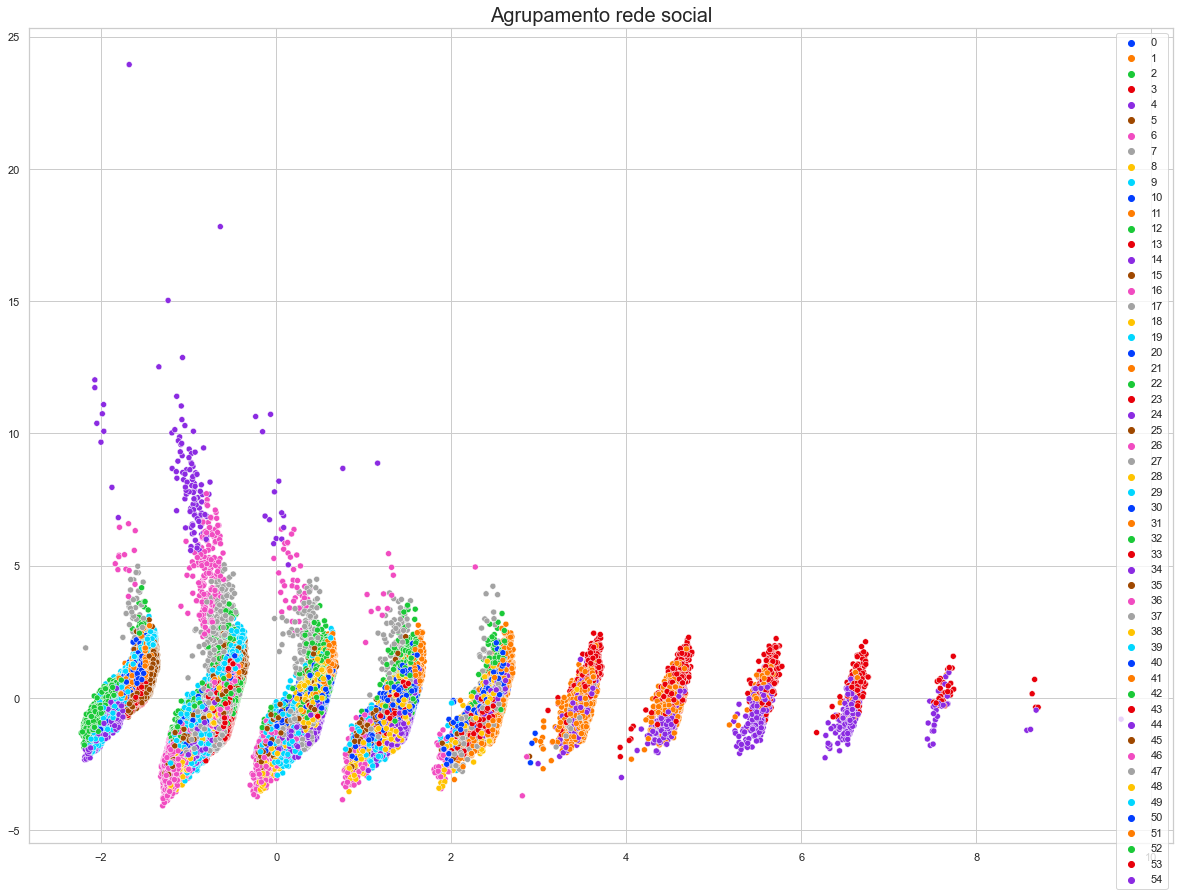

In [40]:
plt.figure(figsize=(20.5, 15))

palette = sns.color_palette('bright', len(set(y_pred)))

sns.scatterplot(X_pca[:, 0], 
                X_pca[:, 1], 
                hue = y_pred, 
                legend = 'full', 
                palette = palette)

plt.title('Agrupamento rede social', fontsize=20);

# Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

faixa_n_clusters = [i for i in range(2,10)]
valores_silhueta = []
print(faixa_n_clusters)

In [ ]:
wcc = []

for K in faixa_n_clusters:
    
    agrupador = KMeans(n_clusters = K, 
                       random_state=25)
    
    labels = agrupador.fit_predict(x_train)
    media_silhueta = silhouette_score(x_train, 
                                      labels)
    valores_silhueta.append(media_silhueta)
    
    print(K)
    print(valores_silhueta)

In [ ]:
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

In [ ]:
print("O coeficiente de silhueta do K-means é: ", silhouette_score(vectorized, labels))